# Objective

Scrape the suspected drug related death data by county from January 1, 2024 - June 30, 2024.

In the event that a 403 code is returned on the GET request, create a User-Agent to communicate with the server of the url endpoint.

- **Suspected Drug Related Deaths Website [HERE](https://www.njoag.gov/programs/nj-cares/nj-cares-suspected-overdose-deaths/)**
- **User-Agent resource [HERE](https://www.useragentstring.com/Internet%20Explorer10.0_id_19880.php)**

In [1]:
# importing packages
import pandas as pd
from scrapy import Selector
import requests as r
import matplotlib.pyplot as plt

In [2]:
# creating url object
url = 'https://www.njoag.gov/programs/nj-cares/nj-cares-suspected-overdose-deaths/'

# creating user agent
headers = {
    'User-Agent': 'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 7.0; InfoPath.3; .NET CLR 3.1.40767; Trident/6.0; en-IN)'    
}
html = r.get(url, headers = headers).content #--> GET request that returns HTML
sel = Selector(text = html) #--> instansiating Selector object

In [3]:
# scraping county data for suspected drug related deaths
county = sel.xpath('//*[@id="post-60426"]/div/div/div/div[2]/div[5]/div[1]/div/div/table/tbody/tr/td[1]/text()').extract()

In [4]:
# scarping suspected death totals for drug related deaths
sus_drug_related_deaths = sel.xpath('//*[@id="post-60426"]/div/div/div/div[2]/div[5]/div[1]/div/div/table/tbody/tr/td[2]/text()').extract()

In [5]:
# creating dataframe
df = pd.DataFrame({'County':county,
             'Suspected Drug Related Deaths':sus_drug_related_deaths})

In [6]:
# data cleaning
df['Suspected Drug Related Deaths'] = df['Suspected Drug Related Deaths'].astype('int')

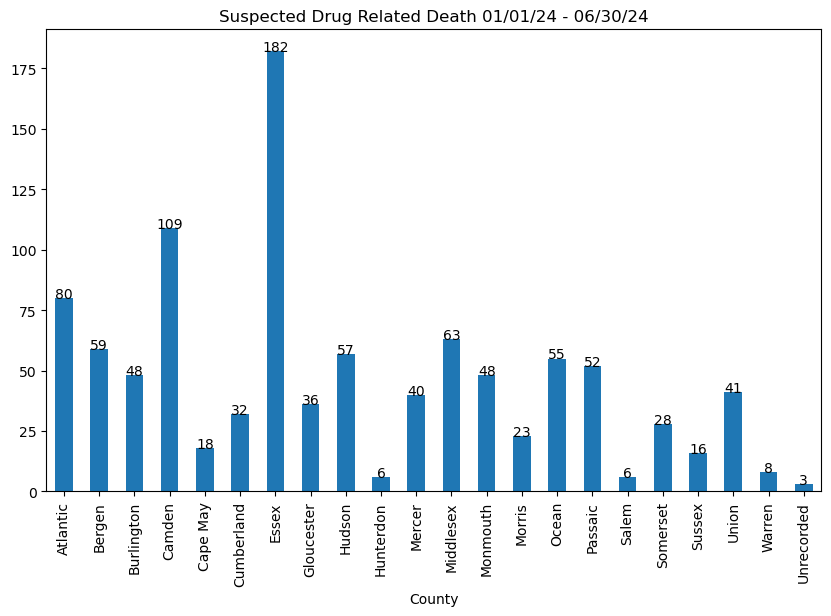

In [7]:
# data visualization
df.plot(x = 'County', y = 'Suspected Drug Related Deaths', kind = 'bar',
        title = 'Suspected Drug Related Death 01/01/24 - 06/30/24', legend = False,figsize = (10,6))

for i,v in enumerate(df['Suspected Drug Related Deaths']):
    plt.text(i,v,str(v), ha = 'center')

plt.show()

In [8]:
# sorting df based on Suspected Drug Related Deaths
df = df.sort_values(by = 'Suspected Drug Related Deaths', ascending = False)
df.reset_index(inplace = True)
df = df[['County','Suspected Drug Related Deaths']]

In [9]:
print('From January 1,2024 through June 30, 2024 there have been a total of',f"{df['Suspected Drug Related Deaths'].sum():,}",
     'suspected drug related deaths.',df['County'][0],'County had the greatest number of suspected drug related death',',',df['Suspected Drug Related Deaths'][0])

From January 1,2024 through June 30, 2024 there have been a total of 1,010 suspected drug related deaths. Essex County had the greatest number of suspected drug related death , 182


In [10]:
#exporting file
df.to_csv('Suspected_Drug_Related_Deaths_01.01.24_06.30.24.csv', index = False, header = True)